# 分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花属性数据，分析三种鸢尾花萼片、花瓣长度和宽度平均值是否存在显著性差异，让我们可以最不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据'iris.csv'包括三种鸢尾花，Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性：花萼长度、花萼宽度、花瓣长度、花瓣宽度。  
'iris.csv'每列的含义为：  
-Id：样本的ID  
-Sepal_length：花萼长度（单位cm）  
-Sepal_width：花萼宽度（单位cm）   
-Petal_length：花瓣长度（单位cm）  
-Petal_width：花瓣宽度（单位cm）   
-Species：种类 

## 读取数据

导入数据分析所需的库，并通过Pandas的read_csv函数将原始数据文件iris.csv中的数据内容分析为DataFrame，并赋值给original_data。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("iris.csv")

In [3]:
original_data.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


## 评估和清理数据

在这一部分中，我们将对建立的original_data DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题保罗存在丢失的数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始数据，我们创建新的clean_data，让它作为original_data复制出的副本。我们之后的清洗步骤都被运用在clean_data上。

In [4]:
cleaned_data = original_data.copy()

## 数据整齐度

In [5]:
cleaned_data.head(10)

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


## 数据干净度

然后通过info，对数据内容进行大致了解。

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


从输出结果来看，cleaned_data共有150条观察值，不存在缺失值。

Id表示样本ID，数据类型不为数字，应为字符串，所以需要进行格式转换。

In [7]:
cleaned_data["Id"] = cleaned_data["Id"].astype("str")
cleaned_data["Id"]

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: object

## 处理缺失值

从info方法的输出结果来看，cleaned_data中的Id是样本的唯一标识，不应该存在重复，因此查看是否存在重复值。

## 处理重复数据

根据数据变量的含义及内容来看，cleaned_data中的Id是样本的唯一标识，不应该存在重复，因此查看是否存在重复值。

In [8]:
cleaned_data["Id"].duplicated().sum()

np.int64(0)

输出结果为零，说明不存在重复值。

## 处理不一致数据

不一致数据可能存在于Species中，我们要查看是否存在多个不同的值指代同一鸢尾花种类的情况。

In [9]:
cleaned_data["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

从以上输出结果来看，Species有三种可能的值，setosa、versicolor、virginica，不存在不一致数据。

我们可以把这列的类型转换为Category，好处是比较字符串类型更节约内存空间，也表明说值的类型有限。

In [10]:
cleaned_data["Species"] = cleaned_data["Species"].astype("category")
cleaned_data["Species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

## 处理无效或错误数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [11]:
cleaned_data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


从上述统计信息来看，cleaned_data中不存在脱离现实意义的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析三种鸢尾花萼片、花瓣的长度和宽度的平均值，是否存在显著性差异。

那么我们可以对数据基于Species列，先把各个鸢尾花种类样本数据筛选出来。

In [12]:
iris_setosa = cleaned_data.query('Species == "setosa"')
iris_setosa.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [13]:
len(iris_setosa)

50

In [14]:
iris_virginica = cleaned_data.query('Species == "virginica"')
iris_virginica.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
100,101,6.3,3.3,6.0,2.5,virginica
101,102,5.8,2.7,5.1,1.9,virginica
102,103,7.1,3.0,5.9,2.1,virginica
103,104,6.3,2.9,5.6,1.8,virginica
104,105,6.5,3.0,5.8,2.2,virginica


In [15]:
len(iris_virginica)

50

In [16]:
iris_versicolor = cleaned_data.query('Species == "versicolor"')
iris_versicolor.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,51,7.0,3.2,4.7,1.4,versicolor
51,52,6.4,3.2,4.5,1.5,versicolor
52,53,6.9,3.1,4.9,1.5,versicolor
53,54,5.5,2.3,4.0,1.3,versicolor
54,55,6.5,2.8,4.6,1.5,versicolor


In [17]:
len(iris_versicolor)

50

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索setosa、versicolor和virginica这三种鸢尾花的变量特点。

可视化探索可以帮助我们对数据有一个更直观的理解，比如了解数据的分布、发现变量之间的关系等，从而为后续的进一步分析提供方向。

针对数据，我们可以直接绘制成对图，利用其中的密度图查看不同变量的分布，以及使用散点图了解变量之间的关系。

并且，由于此次分析的目的是了解不同鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不同种类的样本进行分析。

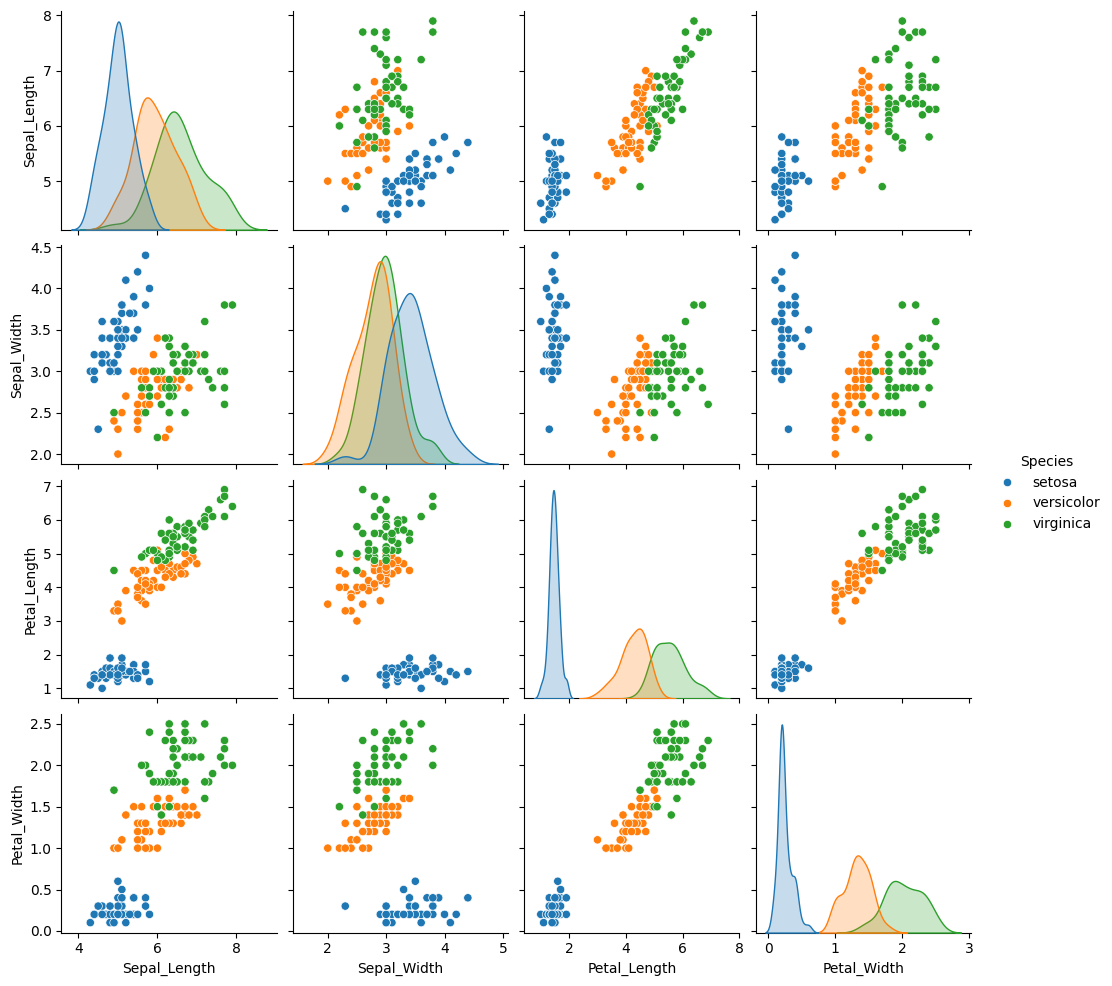

In [18]:
sns.pairplot(cleaned_data,hue="Species")
plt.show()

从以上可以看出，setasa和versicalor,virginica样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，setosa与versicolor，Virginica两种鸢尾花的花瓣长度与宽度有统计显著性差异。versicolor
，Virginica在分布上存在重叠，暂时无法仅从图表下结论，需要进行假设检验。三种鸢尾花的萼片长度和宽度在分布上存在重叠，暂时无法通过图表下结论，同样需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

## 分析数据

我们将利用假设检验，依次检验setasa，versicalor和virginica这三种鸢尾花在萼片、花瓣的长度和宽度的平均值方面，是否存在统计显著性差异。

In [19]:
from scipy.stats import ttest_ind

### 分析萼片长度

setosa,versicolor和virginica萼片长度分布如下：

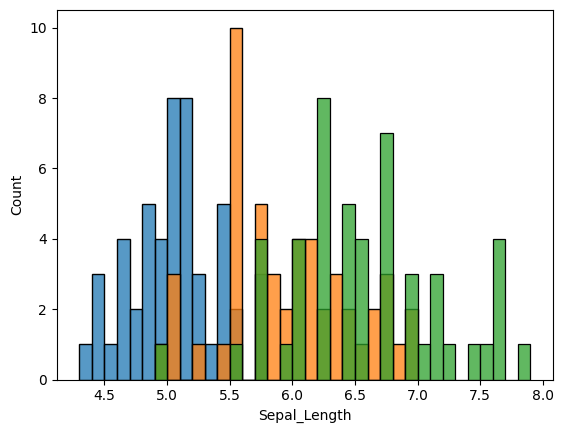

In [20]:
sns.histplot(iris_setosa['Sepal_Length'],binwidth=0.1)
sns.histplot(iris_versicolor['Sepal_Length'],binwidth=0.1)
sns.histplot(iris_virginica['Sepal_Length'],binwidth=0.1)
plt.show()

### 建立假设

$H_0$:setosa和versicolor萼片长度的平均值不存在显著区别。  
$H_1$:setosa和versicolor萼片长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [21]:
t_stat,p_value = ttest_ind(iris_setosa['Sepal_Length'],iris_versicolor['Sepal_Length'])

In [22]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-10.52098626754911
p值：8.985235037487079e-18


### 结论  
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和versicolor萼片长度的平均值存在显著区别。

### 建立假设

$H_0$:setosa和virginica萼片长度的平均值不存在显著区别。  
$H_1$:setosa和virginica萼片长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [23]:
t_stat,p_value = ttest_ind(iris_setosa['Sepal_Length'],iris_virginica['Sepal_Length'])

In [24]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-15.386195820079404
p值：6.892546060674059e-28


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和virginica萼片长度的平均值存在显著区别。

### 建立假设

$H_0$:virginica和versicolor萼片长度的平均值不存在显著区别。  
$H_1$:virginica和versicolor萼片长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [25]:
t_stat,p_value = ttest_ind(iris_virginica['Sepal_Length'],iris_versicolor['Sepal_Length'])

In [26]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：5.629165259719801
p值：1.7248563024547942e-07


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和virginica萼片长度的平均值存在显著区别。

## 分析萼片宽度

setosa,versicolor和virginica萼片宽度分布如下：

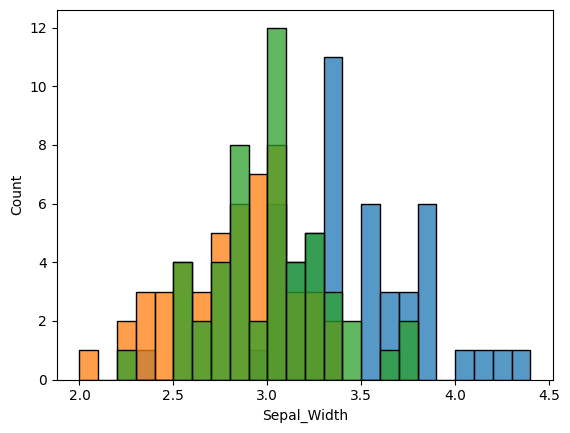

In [27]:
sns.histplot(iris_setosa['Sepal_Width'],binwidth=0.1)
sns.histplot(iris_versicolor['Sepal_Width'],binwidth=0.1)
sns.histplot(iris_virginica['Sepal_Width'],binwidth=0.1)
plt.show()

### 建立假设

$H_0$:setosa和versicolor萼片宽度的平均值不存在显著区别。  
$H_1$:setosa和versicolor萼片宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [28]:
t_stat,p_value = ttest_ind(iris_setosa['Sepal_Width'],iris_versicolor['Sepal_Width'])

In [29]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：9.454975848128596
p值：1.8452599454769322e-15


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和versicolor萼片宽度的平均值存在显著区别。

### 建立假设

$H_0$:setosa和virginica萼片宽度的平均值不存在显著区别。  
$H_1$:setosa和virginica萼片宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [30]:
t_stat,p_value = ttest_ind(iris_setosa['Sepal_Width'],iris_virginica['Sepal_Width'])

In [31]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：6.45034908963073
p值：4.2463553818449584e-09


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和virginica萼片宽度的平均值存在显著区别。

### 建立假设

$H_0$:virginica和versicolor萼片宽度的平均值不存在显著区别。  
$H_1$:virginica和versicolor萼片宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [32]:
t_stat,p_value = ttest_ind(iris_virginica['Sepal_Width'],iris_versicolor['Sepal_Width'])

In [33]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：3.2057607502218186
p值：0.0018191004238894803


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和versicolor萼片宽度的平均值存在显著区别。

### 分析花瓣长度

setosa,versicolor和virginica花瓣长度分布如下：

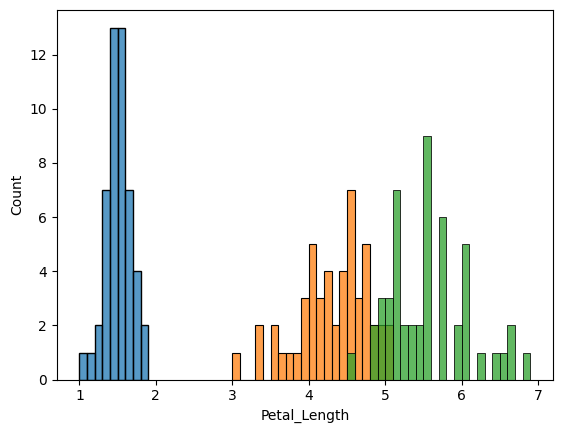

In [34]:
sns.histplot(iris_setosa['Petal_Length'],binwidth=0.1)
sns.histplot(iris_versicolor['Petal_Length'],binwidth=0.1)
sns.histplot(iris_virginica['Petal_Length'],binwidth=0.1)
plt.show()

### 建立假设

$H_0$:setosa和versicolor花瓣长度的平均值不存在显著区别。  
$H_1$:setosa和versicolor花瓣长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [35]:
t_stat,p_value = ttest_ind(iris_setosa['Petal_Length'],iris_versicolor['Petal_Length'])

In [36]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-39.492719391538095
p值：5.404910513441677e-62


### 结论  
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和versicolor花瓣长度的平均值存在显著区别。

### 建立假设

$H_0$:setosa和virginica花瓣长度的平均值不存在显著区别。  
$H_1$:setosa和virginica花瓣长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [37]:
t_stat,p_value = ttest_ind(iris_setosa['Petal_Length'],iris_virginica['Petal_Length'])

In [38]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-49.98618625709594
p值：1.5048006992427275e-71


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和virginica花瓣长度的平均值存在显著区别。

### 建立假设

$H_0$:virginica和versicolor花瓣长度的平均值不存在显著区别。  
$H_1$:virginica和versicolor花瓣长度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [39]:
t_stat,p_value = ttest_ind(iris_virginica['Petal_Length'],iris_versicolor['Petal_Length'])

In [40]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：12.603779441384985
p值：3.1788195478061495e-22


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明virginica和versicolor花瓣长度的平均值存在显著区别。

## 分析花瓣宽度

setosa,versicolor和virginica花瓣宽度分布如下：

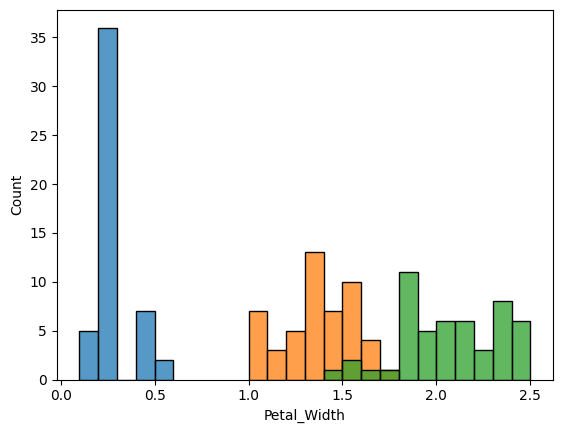

In [41]:
sns.histplot(iris_setosa['Petal_Width'],binwidth=0.1)
sns.histplot(iris_versicolor['Petal_Width'],binwidth=0.1)
sns.histplot(iris_virginica['Petal_Width'],binwidth=0.1)
plt.show()

### 建立假设

$H_0$:setosa和versicolor花瓣宽度的平均值不存在显著区别。  
$H_1$:setosa和versicolor花瓣宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [42]:
t_stat,p_value = ttest_ind(iris_setosa['Petal_Width'],iris_versicolor['Petal_Width'])

In [43]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-34.08034154357719
p值：3.831095388248162e-56


### 结论  
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和versicolor花瓣宽度的平均值存在显著区别。

### 建立假设

$H_0$:setosa和virginica花瓣宽度的平均值不存在显著区别。  
$H_1$:setosa和virginica花瓣宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [44]:
t_stat,p_value = ttest_ind(iris_setosa['Petal_Width'],iris_virginica['Petal_Width'])

In [45]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-42.7857975196172
p值：3.230374818431802e-65


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明setosa和virginica花瓣宽度的平均值存在显著区别。

### 建立假设

$H_0$:virginica和versicolor花瓣宽度的平均值不存在显著区别。  
$H_1$:virginica和versicolor花瓣宽度的平均值存在显著区别。

### 确定检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更宽，所以是双尾检验。

### 确定显著水平

选择0.05作为显著水平。

### 计算t值和p值

In [46]:
t_stat,p_value = ttest_ind(iris_virginica['Petal_Width'],iris_versicolor['Petal_Width'])

In [47]:
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：14.625367047410148
p值：2.2304090710248333e-26


### 结论
由于p值小于显著水平0.05，我们因此拒绝原假设，说明virginica和versicolor花瓣宽度的平均值存在显著区别。

# 总结  
通过推论统计学的计算过程，我们发现setosa,versicolor和virginica鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。